# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


# Data Validation
the dataset has **947 rows and 8 columns** before any cleaning, I dropped the rows where 'calories','carbohydrate','sugar',and 'protein' as all Null <br>
I have validated the data as following: <br>
- **recipe**: 947 unique numeric value, 895 after cleaning, no missing data, same as description, no changes were made
- **calories**: 895 non missing numeric value, dropped all missing values
- **carbohydrate**: 895 non missing numeric value, dropped all missing values
- **sugar**: 895 non missing numeric value, dropped all missing values
- **protein**: 895 non missing numeric value, dropped all missing values
- **category**: 11 unique value, replaced 'Chicken Breast' with 'Chicken' so it matches the description with 10 unique values, no missing values
- **servings**: 6 unique values, unified similar values ex:'6 as a snack' to '6', changed datatype from string to numeric to match the description, no missing values
- **high_traffic**: 1 non null unique value (High), replaced all null values with 'Low' to make data manipulation and machine learning easier

After data cleaning and validation, the dataset has **895 rows and 8 columns** with no null values

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [128]:
df=pd.read_csv('recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


# Missing data visualized
From this graph we can see that all missing values in columns 'calories','carbohydrate','sugar',and 'protein' are linked. Where there are recipes with no nutritional values available. as they make only ~5% of our dataset, i decided to drop them <br>
We can also notice a lot of missing values in column 'high_traffic', upon further investigation we see that there wasn't a value provided for Low traffic, so we replaced all Nulls with Low

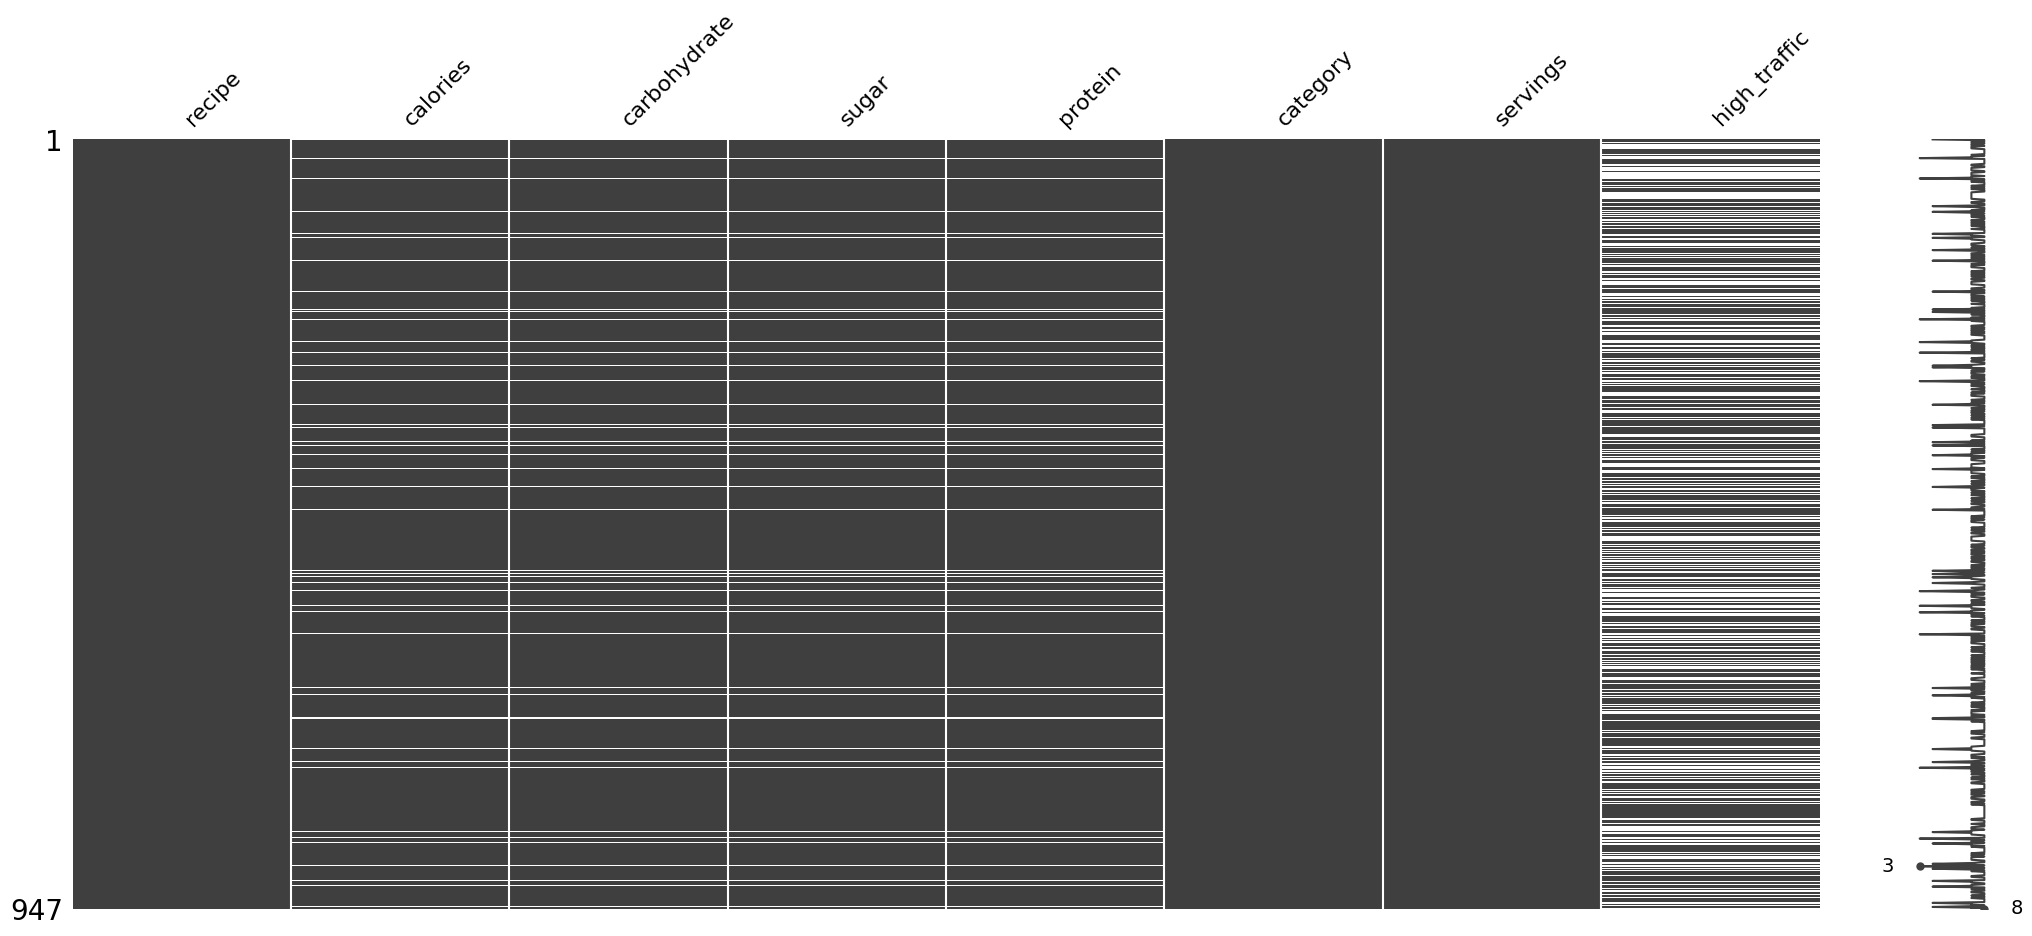

In [129]:
msno.matrix(df)
plt.show()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [131]:
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [132]:
df['category']=df['category'].str.replace('Chicken Breast','Chicken')
df.category.unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [133]:
df['high_traffic'].unique()

array(['High', nan], dtype=object)

In [134]:
df['high_traffic'].fillna('Low',inplace=True)
df['high_traffic'].unique()

array(['High', 'Low'], dtype=object)

In [135]:
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [136]:
df['servings']=df['servings'].str.replace(' as a snack','')
df['servings']=df['servings'].astype('int64')
df['servings'].unique()

array([6, 4, 1, 2])

In [137]:
df.duplicated().sum()

0

In [138]:
df.dropna(inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    int64  
 7   high_traffic  895 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 62.9+ KB


# Explanatory Data Analysis (EDA)
from our dataset, we can see that Potatoes and Vegetable recipes are our most popular types of recipes, bringing in a total of 29% of all High traffic. while Breakfast and Beverages are our least popular recipes, bringing in 6.3% and 0.9% of all High traffic respectively

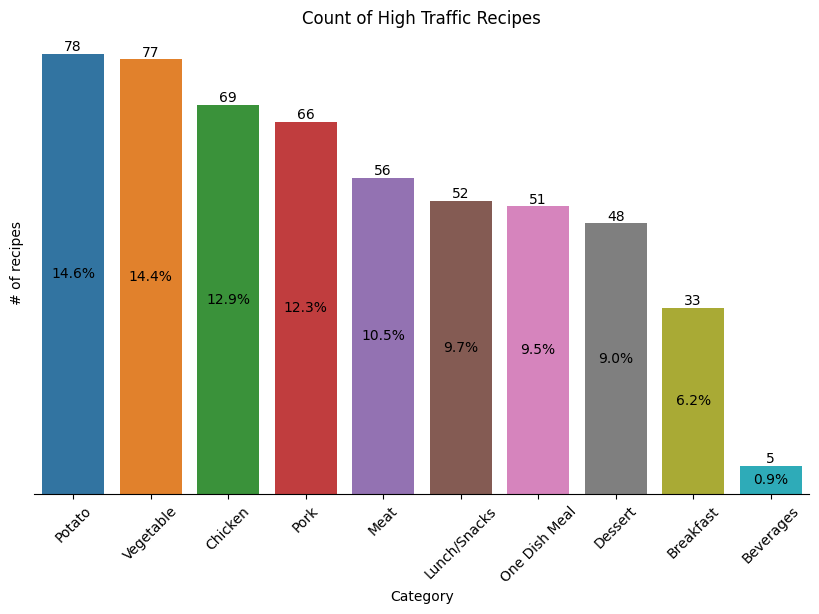

In [140]:
fig,ax=plt.subplots(figsize=(10,6))

dfhigh=df.query("high_traffic == 'High'")
sorthigh=dfhigh['category'].value_counts()
order=(sorthigh.index)

sns.countplot(data=dfhigh,x='category',order=order,ax=ax)

total = len(dfhigh)

for i in ax.containers:
    # For each bar, calculate the percentage and display it
    for rect in i:
        height = rect.get_height()
        count = int(height)
        percentage = '{:.1f}%'.format(100 * height/total)
        
        # Display the count above the bar
        ax.text(rect.get_x() + rect.get_width() / 2, height, count,
                ha='center', va='bottom')
        
        # Display the percentage inside the bar
        ax.text(rect.get_x() + rect.get_width() / 2, height/2, percentage,
                ha='center', va='center')

for label in ax.get_xticklabels():
        label.set_rotation(45)
        
ax.set(yticklabels='')
ax.set_yticks([])
ax.set_xlabel('Category',y=0.98)
ax.set_ylabel("# of recipes")
ax.set_title('Count of High Traffic Recipes')
sns.despine(left=True)
plt.show()

In terms of Servings, we can see that 4 Servings is the most popular amount of servings in general, bringing in 41% of both High traffic and Low Traffic. while the rest of the servings options bring in approximately the same amount in both categories

In [141]:
df2=df.copy()
df2['namedServings']=df2['servings'].astype('str') + " servings"
df2['namedServings']=df2['namedServings'].str.replace('1 servings', '1 serving')
dfgroup = df2.groupby('high_traffic')['namedServings'].value_counts().reset_index(name='count')


fig = px.sunburst(dfgroup, values='count', path=['high_traffic','namedServings'],\
                 title='Distribution of Servings in High and Low Traffic ')


fig.update_traces(sort=True, selector=dict(type='sunburst'),textinfo='label+percent parent') 

fig.update_layout(title_x=0.5)

fig.show()

When we check out the distribution of our Nutritional Values columns, we can see that they're all right skewed, which indicates that they need to be Standardized when building a model

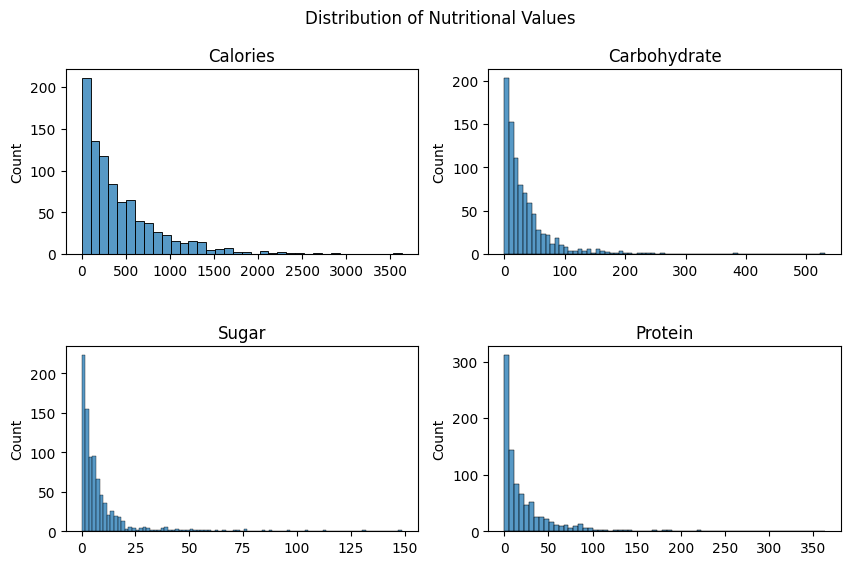

In [142]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

sns.histplot(x=df['calories'], ax=ax[0,0])
ax[0,0].set_xlabel('')
ax[0,0].set_title('Calories')

sns.histplot(x=df['carbohydrate'], ax=ax[0,1])
ax[0,1].set_xlabel('')
ax[0,1].set_title('Carbohydrate')

sns.histplot(x=df['sugar'], ax=ax[1,0])
ax[1,0].set_xlabel('')
ax[1,0].set_title('Sugar')

sns.histplot(x=df['protein'], ax=ax[1,1])
ax[1,1].set_xlabel('')
ax[1,1].set_title('Protein')

fig.suptitle("Distribution of Nutritional Values")
fig.subplots_adjust(hspace=0.5)

plt.show()

checking out the correlation between our numerical values, we see no strong pearson correlation between any 2 variables, where the strongest correlation is between proteins and calories at 0.17

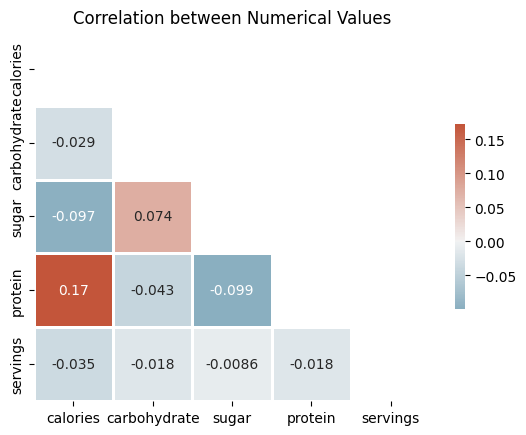

In [143]:
dfcol=df[['calories', 'carbohydrate', 'sugar', 'protein','servings']]
corr=dfcol.corr()
mask = np.triu(corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

g=sns.heatmap(corr, mask=mask, cmap=cmap,center=0,annot=True,linewidths=.9,cbar_kws={"shrink": .5})
g.set_title("Correlation between Numerical Values")
plt.show()

# Model Development
since we're identifying whether a recipe gets high traffic or not, this is a Classification problem. <br>
We start by Spliting our data into input and output variables, then encoding our categorical data and scaling our numerical data. then we split the data into 80% training and 20% testing. <br>
Our base model is a KNN model where we use RandomizedSearchCV to find the optimal parameters for it. the optimized KNN model reaches an accuracy of 73% <br>
Our comparison model is a Logistic regression model which also uses RandomizedSearchCV to find the optimal parameters. The optimized LogReg model reaches an accuracy of 77.7% <br>

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,ConfusionMatrixDisplay,classification_report

In [145]:
X=df.drop(['recipe','high_traffic'],axis=1)
X['category']=LabelEncoder().fit_transform(X['category'])

Y=df['high_traffic'].replace({"High": 1, "Low": 0})

scale=MinMaxScaler()
X2=scale.fit_transform(X)

In [146]:
xTrain,xTest,yTrain,yTest=train_test_split(X2,Y,test_size=0.2,random_state=42)

In [147]:
params1={'n_neighbors': list(range(1, 31)),
           'weights': ['uniform', 'distance'],
           'metric': ['euclidean', 'manhattan', 'minkowski'],
           'leaf_size': list(range(1,50)),
           'p': [1, 2]}

Grid1=RandomizedSearchCV(KNeighborsClassifier(),params1,cv=10,n_jobs=-1)
Grid1.fit(xTrain,yTrain)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [148]:
Grid1.score(xTest,yTest)

0.7094972067039106

In [149]:
print(f'The best params for KNN are {Grid1.best_params_}')

The best params for KNN are {'weights': 'uniform', 'p': 1, 'n_neighbors': 23, 'metric': 'euclidean', 'leaf_size': 15}


In [150]:
params2 = {'penalty': ['l1', 'l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'fit_intercept': [True, False],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'max_iter': [100, 500, 1000]}

Grid2=RandomizedSearchCV(LogisticRegression(),params2,cv=10,n_jobs=-1)
Grid2.fit(xTrain,yTrain)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [151]:
Grid2.score(xTest,yTest)

0.776536312849162

In [152]:
display(f'The best params for LogReg are {Grid2.best_params_}')

"The best params for LogReg are {'solver': 'saga', 'penalty': 'l2', 'max_iter': 500, 'fit_intercept': True, 'C': 0.1}"

# Model evaluation
Since we're trying to predict high traffic recipes, our metrics will be Precision, Recall and f1-score. <br>

In [153]:
predknn=Grid1.predict(xTest)
predlog=Grid2.predict(xTest)

confknn=confusion_matrix(yTest,predknn)
conflog=confusion_matrix(yTest,predlog)

We can see from the following Confusion Matrices that the logistic regression has higher TP and TN counts, and lower FP and FN counts. <br>
Running a classification report on KNN shows that it has Precision: 0.71, Recall: 0.86, f1-score:0.78 <br>
While running it on LogReg shows that is has Precision: 0.8, Recall: 0.83, f1-score:0.81 <br>

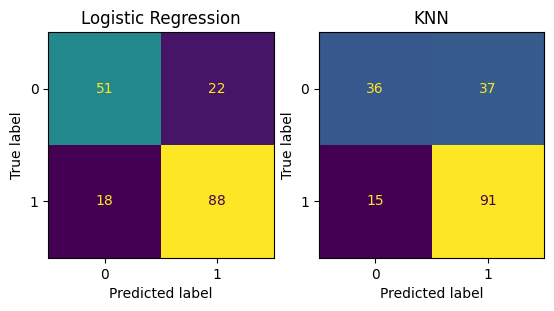

In [154]:
fig,(ax0,ax1)=plt.subplots(nrows=1,ncols=2)
g=ConfusionMatrixDisplay(confusion_matrix=confknn,display_labels=Grid1.classes_)
g2=ConfusionMatrixDisplay(confusion_matrix=conflog,display_labels=Grid2.classes_)
g.plot(ax=ax1,colorbar=False)
g2.plot(ax=ax0,colorbar=False)

ax0.set_title("Logistic Regression")
ax1.set_title("KNN")
plt.show()

In [155]:
print(classification_report(yTest,predknn))

              precision    recall  f1-score   support

           0       0.71      0.49      0.58        73
           1       0.71      0.86      0.78       106

    accuracy                           0.71       179
   macro avg       0.71      0.68      0.68       179
weighted avg       0.71      0.71      0.70       179



In [156]:
print(classification_report(yTest,predlog))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        73
           1       0.80      0.83      0.81       106

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [157]:
knnauc=roc_auc_score(yTest,predknn)

In [158]:
logauc=roc_auc_score(yTest,predlog)

In [159]:
predknnproba=Grid1.predict_proba(xTest)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(yTest, predknnproba)

predlogproba=Grid2.predict_proba(xTest)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(yTest, predlogproba)

Looking at the ROC curve of both models we can see that the Logistic Regression model has a higher true positive rate and a lower false positive rate compared to the KNN model. <br>
We can also see that the ROC AUC score of the Logistic Regression model is 0.76, higher than the KNN's 0.68, confirming that the LogReg model is better for detecting High traffic recipes

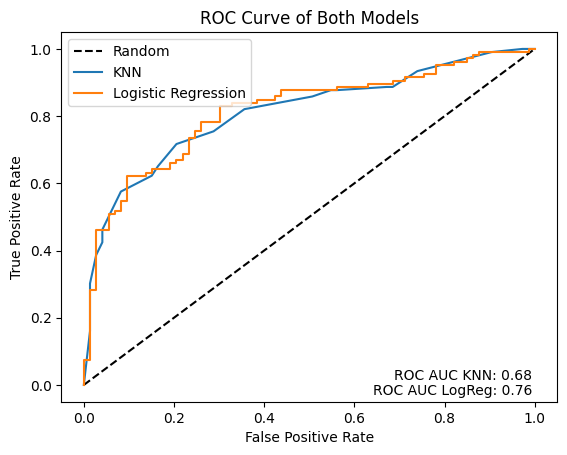

In [163]:
plt.plot([0,1],[0,1],'k--',label='Random')
plt.plot(fpr1,tpr1,label='KNN')
plt.plot(fpr2,tpr2,label='Logistic Regression')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Both Models")

plt.text(0.95, 0.05, 'ROC AUC KNN: {:.2f}'.format(knnauc), 
         horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes)
plt.text(0.95, 0.01, 'ROC AUC LogReg: {:.2f}'.format(logauc), 
         horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes)

plt.legend(loc='upper left')
plt.show()

We can see that the most important feature to our Logistic Regression model is 'category'

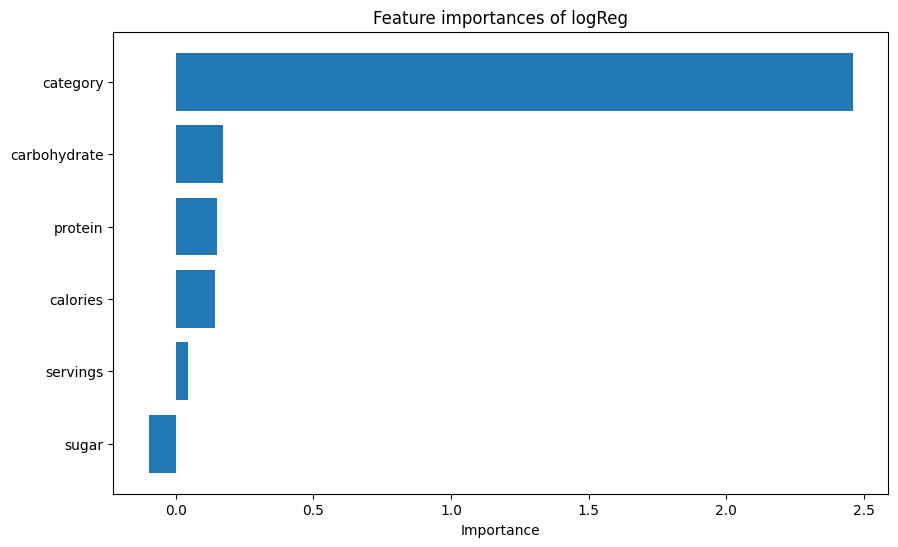

In [165]:
# Get the best estimator
best_model = Grid2.best_estimator_

# Get the coefficients of the logistic regression model
importance = best_model.coef_[0]

# Assuming X is your feature matrix
feature_names = X.columns

# Sort the feature importance in descending order
sorted_idx = np.argsort(importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances of logReg')
plt.show()

# Business Metrics

Our goals are 2 things:
- Predict which recipes will lead to high traffic?
- Correctly predict high traffic recipes 80% of the time?

A good metric to measure the success of those 2 goals is to measure Precision, Recall, and F1-score<br>

Our Logistic Regression model achieves those goals as it has Precision, Recall, and F1-score equal to or above 80%

# Recommendations
We can put our logistic regression model into production to aid the product manager in predicting the high traffic of the recipes. By using this model, approximately 80% of the predictions will ensure that there will be heavy traffic. 

To implement and improve the model, I will consider the following steps:
- Deploying the model into production, preferaably using edge devices for ease and security
- Collecting more data such as time to make, ingredients, site duration time,etc.
- Feature Engineering such as increasing the number of values in category column, creating more meaningful features from the variables

# KPIs
A good KPI for these models is the accuracy score and ROC AUC score to see how effective the model is at predictions <br>

The KNN model has an accuracy of ~73% and an ROC AUC score of ~0.67 <br>
Whereas the LogReg model has an accuracy of ~78% and an ROC AUC score of ~0.75 <br>

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation